In [1]:
# DS basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# pickle
import pickle
import json
import requests

In [21]:
# iris = sns.load_dataset('Iris')
# iris.head()
iris = pd.read_csv("Iris.csv")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [22]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

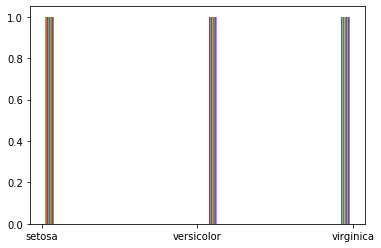

In [23]:
# check distribution of Y
plt.hist(iris['species'])
plt.show()

In [24]:
# encode
le = LabelEncoder()
le.fit(iris['species'])

LabelEncoder()

In [25]:
iris['species'] = le.transform(iris['species'])

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# features
X = iris.iloc[:, 0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y = iris.iloc[:,4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=123)

In [30]:
algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [31]:
preds = model.predict(X_test)

In [32]:
print(accuracy_score(y_test, preds))

0.9210526315789473


In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.73      1.00      0.84         8
           2       1.00      0.79      0.88        14

   micro avg       0.92      0.92      0.92        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.94      0.92      0.92        38



In [34]:
# pickle
# wb = write binary, rb = read binary
pickle.dump(model, open('iris_model.pkl', 'wb'))

In [35]:
my_model = pickle.load(open('iris_model.pkl', 'rb'))

In [36]:
url = 'http://localhost:9000/api'

In [37]:
data = json.dumps({'sepal_length': 3.3, 'sepal_width': 1.8, 'petal_length': 2.5, 'petal_width': 3.8})

In [38]:
send = requests.post(url, data)

In [39]:
print(send.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)